In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,6
import seaborn as sns
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)

In [88]:
df=pd.read_csv("ZomatoRestaurantsIndia.csv")
df.head()
df = df.drop_duplicates(subset=["res_id","name","city","locality","average_cost_for_two"],keep="first")

In [89]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [135]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,5.556900e+04,55569.000000,55569.000000,55569.000000,55569.0,55569.000000,55569.000000,55569.000000,55569.000000,55569.000000,55557.0,55569.000000,55569.0
mean,1.313705e+07,3409.438554,21.451130,76.497158,1.0,528.199968,1.714715,2.958540,223.328780,160.971999,0.0,-0.349799,-1.0
std,8.105925e+06,5174.915984,42.900725,10.982879,0.0,595.024722,0.878224,1.464617,618.218436,586.970464,0.0,0.933803,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.0
25%,3.001352e+06,8.000000,16.518533,74.645899,1.0,200.000000,1.000000,2.900000,6.000000,1.000000,0.0,-1.000000,-1.0
50%,1.869268e+07,26.000000,22.468647,77.106358,1.0,350.000000,1.000000,3.500000,35.000000,10.000000,0.0,-1.000000,-1.0
75%,1.887262e+07,11294.000000,26.752979,79.831640,1.0,600.000000,2.000000,3.900000,175.000000,69.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


Text(0.5, 1.0, 'TOP 10 cities with most no of restaurants')

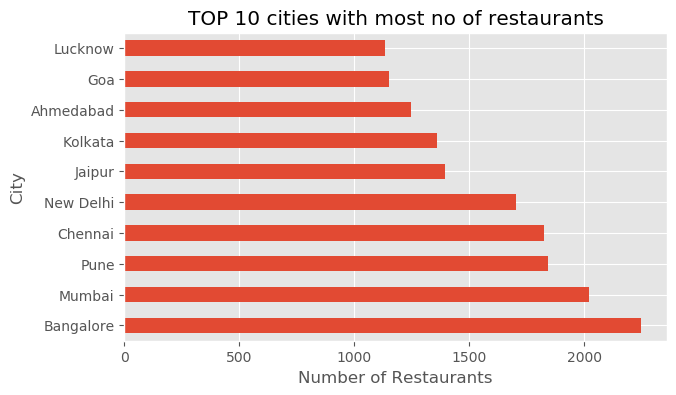

In [91]:
count_by_city=df.groupby("city")["name"].count().sort_values(ascending=False)[0:10]
count_by_city
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(7,4))
count_by_city.plot(kind="barh",legend=False,ax=ax)
ax.set_xlabel("Number of Restaurants")
ax.set_ylabel("City")
ax.set_title("TOP 10 cities with most no of restaurants")

Now we want to know how many of these restaurants deliver online? Is it directly proportional to the number of restaurants?

In [92]:
df["delivery"].describe()

count    55569.000000
mean        -0.349799
std          0.933803
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          1.000000
max          1.000000
Name: delivery, dtype: float64

Text(0.5, 1.0, 'TOP 10 cities with most no of restaurants delivering')

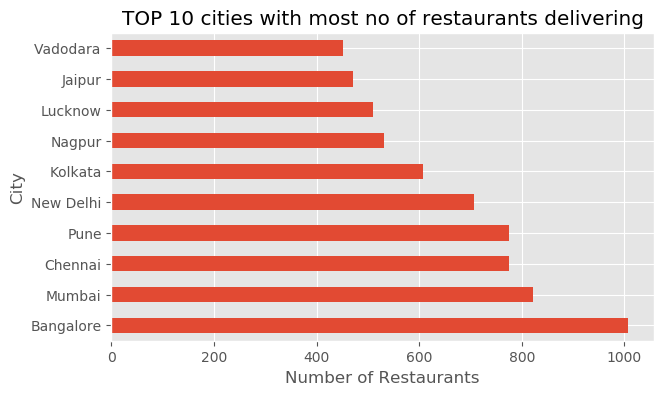

In [93]:
deliver=df.loc[df["delivery"]==1].groupby("city")["name"].count().sort_values(ascending=False)[0:10]
deliver
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(7,4))
deliver.plot(kind="barh",legend=False,ax=ax)
ax.set_xlabel("Number of Restaurants")
ax.set_ylabel("City")
ax.set_title("TOP 10 cities with most no of restaurants delivering")

Chennai agains leads at deliveries. Lukhnow beats Bangalore at second place.

In [94]:
count = df.groupby("city")["name"].count().sort_values(ascending=False)
delivery = df.loc[df["delivery"]==1].groupby("city")["name"].count().sort_values(ascending=False)
merge = pd.merge(count,delivery,on="city")
merge["percentage"] = merge["name_y"]*100/merge["name_x"]
merge.sort_values(by="name_x")
merge=merge[0:20]
merge=merge.sort_values(by="percentage",ascending=False)
merge.reset_index()
merge

,name_x,name_y,percentage
city,,,
Agra,834,428,51.318945
Nagpur,1039,532,51.203080
Vadodara,963,452,46.936656
Bhopal,906,415,45.805740
Lucknow,1135,510,44.933921
Bangalore,2247,1007,44.815309
Kolkata,1361,607,44.599559
Hyderabad,822,366,44.525547
Raipur,784,347,44.260204


Text(0, 0.5, 'City')

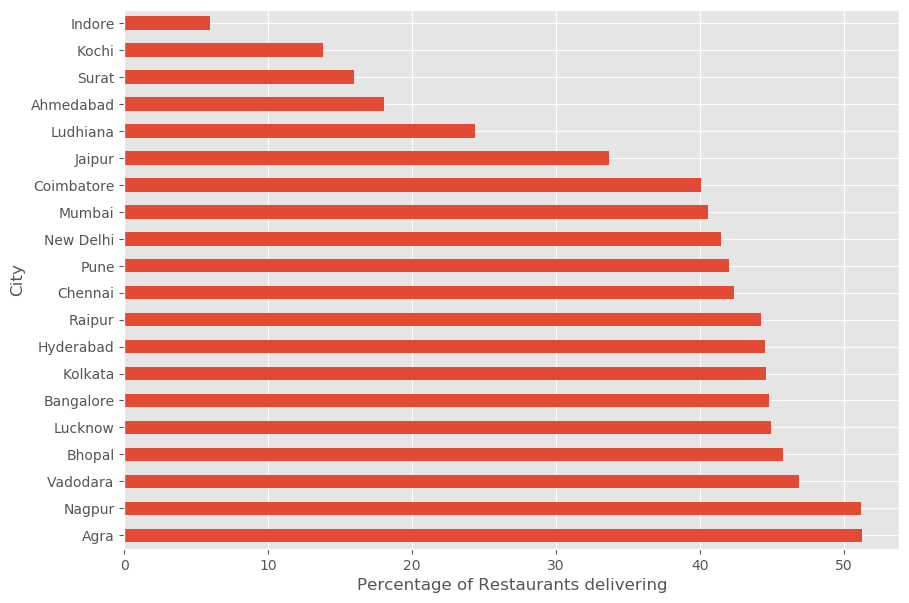

In [95]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(10,7))
merge.plot(y="percentage",kind="barh",legend=False,ax=ax)
ax.set_xlabel("Percentage of Restaurants delivering")
ax.set_ylabel("City")

Market penetration of zomato is most in north-india with max being in Agra going up to 52%.

In [96]:
establishment = df.groupby(["establishment","city"])["res_id"].count().sort_values(ascending=False).reset_index()
establishment.columns=["establishment","city","count"]
establishment = establishment.dropna()
most_establishment = establishment[establishment["count"]==establishment.groupby(["establishment"])["count"].transform("max")]
most_establishment

,establishment,city,count
0,Casual Dining,Mumbai,521
6,Quick Bites,Bangalore,279
82,Bar,Pune,159
83,Dessert Parlour,Bangalore,158
88,Beverage Shop,Bangalore,145
90,Fine Dining,Mumbai,144
104,Café,Bangalore,133
117,Bakery,Coimbatore,119
120,Sweet Shop,Bangalore,117
141,Dhaba,Jaipur,101


In [97]:
establishment = df.groupby(["establishment","city"])["res_id"].count().sort_values(ascending=False).reset_index()
establishment.columns=["establishment","city","count"]
establishment = establishment.dropna()
citywise = establishment[establishment["count"]==establishment.groupby(["city"])["count"].transform("max")]
citywise

,establishment,city,count
0,Casual Dining,Mumbai,521
1,Casual Dining,Bangalore,488
2,Casual Dining,Goa,482
3,Casual Dining,Chennai,476
4,Casual Dining,Pune,433
...,...,...,...
694,Food Court,Howrah,14
702,Quick Bites,Faridabad,13
712,Casual Dining,Neemrana,13
942,Quick Bites,Greater Noida,7


In [98]:
df["locality_verbose"].unique()

array(['Khandari, Agra', 'Agra Cantt, Agra', 'Shahganj, Agra', ...,
       'Navapura, Vadodara', 'L&T Knowledge City, Vadodara',
       'Danteshwar, Vadodara'], dtype=object)

In [99]:
df["locality"].unique()

array(['Khandari', 'Agra Cantt', 'Shahganj', ..., 'Navapura',
       'L&T Knowledge City', 'Danteshwar'], dtype=object)

In [100]:
max_in_locality=df.groupby(["locality","city"])["res_id"].count().sort_values(ascending=False).reset_index()
max_in_locality

,locality,city,res_id
0,Gomti Nagar,Lucknow,274
1,Lashkar,Gwalior,224
2,Model Town,Jalandhar,217
3,College Road,Nashik,217
4,CIDCO,Aurangabad,211
...,...,...,...
3905,"Royalton Hotel, Abids",Hyderabad,1
3906,George Town,Chennai,1
3907,"Eskay Resorts, Borivali West",Mumbai,1
3908,"Ramada Plaza, Ambala Road, Zirakpur",Zirakpur,1


In [101]:
most_priced_locality = df.groupby(["locality","city"])["average_cost_for_two"].mean().sort_values(ascending=False).reset_index()
most_priced_locality

,locality,city,average_cost_for_two
0,"Umaid Bhawan Palace, Cantt Area",Jodhpur,12000.00
1,"Taj Falaknuma, Falaknuma",Hyderabad,8250.00
2,"Taj Lake Palace, Pichola",Udaipur,8000.00
3,"Sahara Star, Vile Parle East",Mumbai,7243.75
4,"Deltin Royale, Panaji",Goa,6500.00
...,...,...,...
3905,Vidyasagarpur,Kharagpur,0.00
3906,New Settlement,Kharagpur,0.00
3907,South Side,Kharagpur,0.00
3908,Days Hotel Neemrana,Neemrana,0.00


In [102]:
most_priced_city = df.groupby(["city"])["average_cost_for_two"].mean().sort_values(ascending=False).reset_index()
most_priced_city[0:10]

,city,average_cost_for_two
0,Mumbai,1075.098912
1,New Delhi,994.870892
2,Gurgaon,982.262295
3,Hyderabad,850.706813
4,Bangalore,799.105474
5,Goa,793.286957
6,Navi Mumbai,762.367150
7,Pune,740.567010
8,Noida,734.980843
9,Chennai,731.970443


In [103]:
def most_priced_restaurant_city(city):
    grouped = df.loc[df["city"]==city]
    largest = grouped.nlargest(10,"average_cost_for_two",keep="all")
    return largest[["name","average_cost_for_two"]]

def price_per_establishment():
    grouped = df.groupby("establishment")["average_cost_for_two"].mean().sort_values(ascending=False).reset_index()
    return grouped

def rating_per_establishment():
    df_filtered=df[(df["aggregate_rating"]>0) & (df["votes"]>200)]
    grouped_est = df_filtered.groupby("establishment")["aggregate_rating"].count().sort_values(ascending=False).reset_index()
    grouped = df_filtered.groupby("establishment")["aggregate_rating"].sum().sort_values(ascending=False).reset_index()
    merge = pd.merge(grouped,grouped_est,on="establishment")
    merge["average_rating"]=merge["aggregate_rating_x"]/merge["aggregate_rating_y"]
    return merge.sort_values(by=["aggregate_rating_y","average_rating",],ascending=False)

In [104]:
most_priced_restaurant_city("Mumbai")
price_per_establishment()
rating_per_establishment()

,establishment,aggregate_rating_x,aggregate_rating_y,average_rating
0,Casual Dining,18311.4,4493,4.075540
1,Quick Bites,12349.6,3129,3.946820
2,Café,4918.4,1187,4.143555
3,Dessert Parlour,2558.0,605,4.228099
4,Fine Dining,2450.2,583,4.202744
5,Bar,1972.9,470,4.197660
6,Bakery,1611.5,391,4.121483
7,Lounge,1217.5,297,4.099327
8,Sweet Shop,1073.8,269,3.991822
9,Pub,902.5,220,4.102273


In [112]:
def clean_text(x,city):
    'extract the data and count it from comma separted string values in column x returns a pd.Series ready to plot'
    return pd.Series([e.strip() for i in df[(df[x].notnull()) & (df["city"]==city)][x] for e in i.split(',') if e!='[]' if i ])

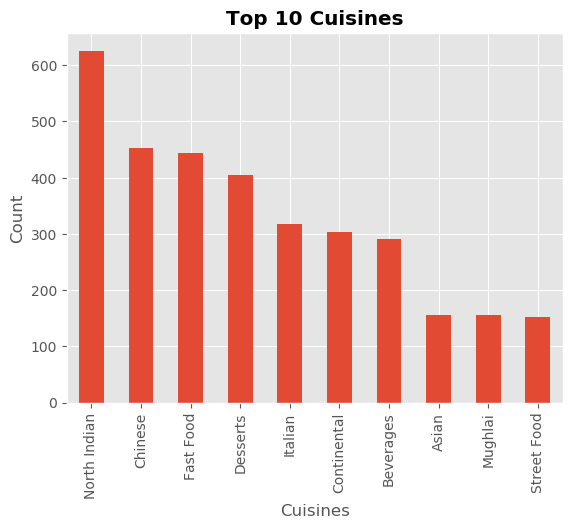

In [113]:
clean_text('cuisines','Mumbai').value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Cuisines', weight='bold')
plt.xlabel('Cuisines')
plt.ylabel('Count');

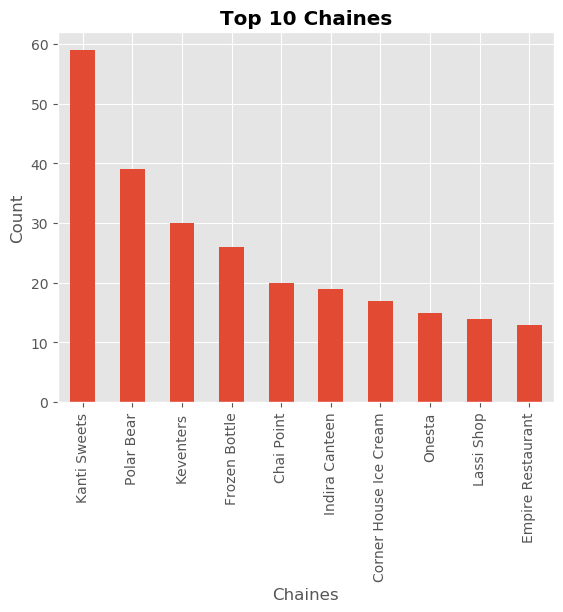

In [114]:
clean_text('name','Bangalore').value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Chaines', weight='bold')
plt.xlabel('Chaines')
plt.ylabel('Count');

Text(0.5, 1.0, 'Votes Versus Rate')

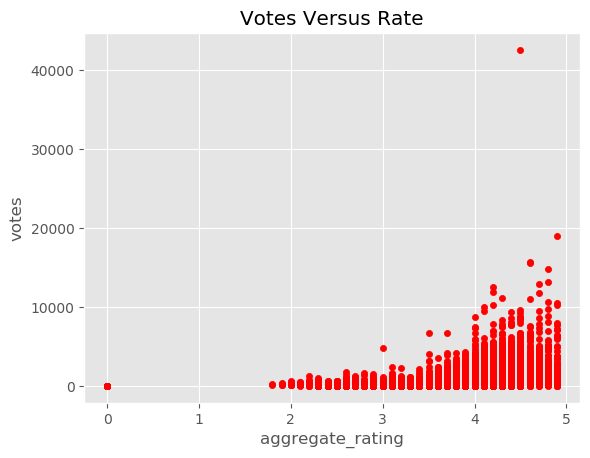

In [115]:
df.plot(kind='scatter',x='aggregate_rating',y='votes',marker='o',color='r',grid=True)
plt.title('Votes Versus Rate')

Text(0.5, 1.0, 'Rating Versus cost')

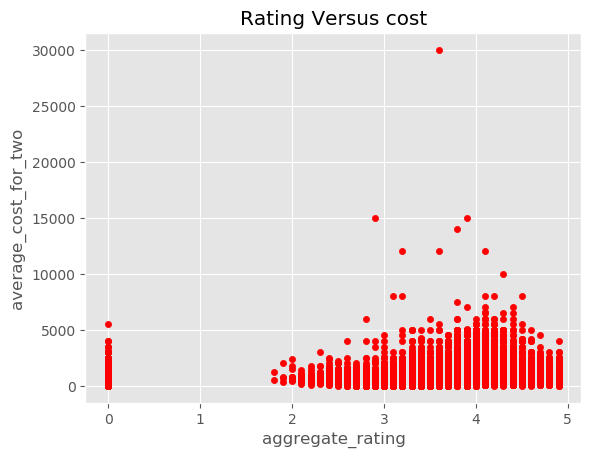

In [117]:
df.plot(kind='scatter',x='aggregate_rating',y='average_cost_for_two',marker='o',color='r',grid=True)
plt.title('Rating Versus cost')

TypeError: object of type 'float' has no len()

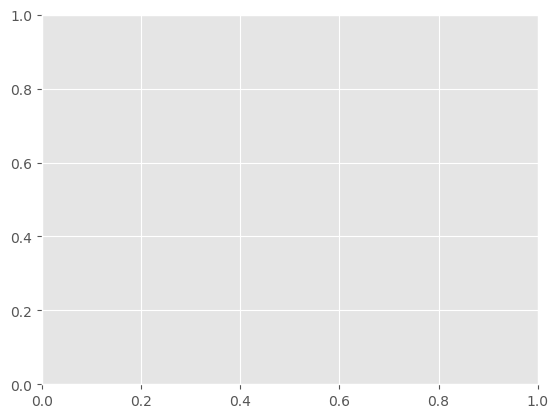

In [134]:
df.plot(kind='hist',y='aggregate_rating',color='r',grid=True,bins=.5)
plt.title("Rating histogram")

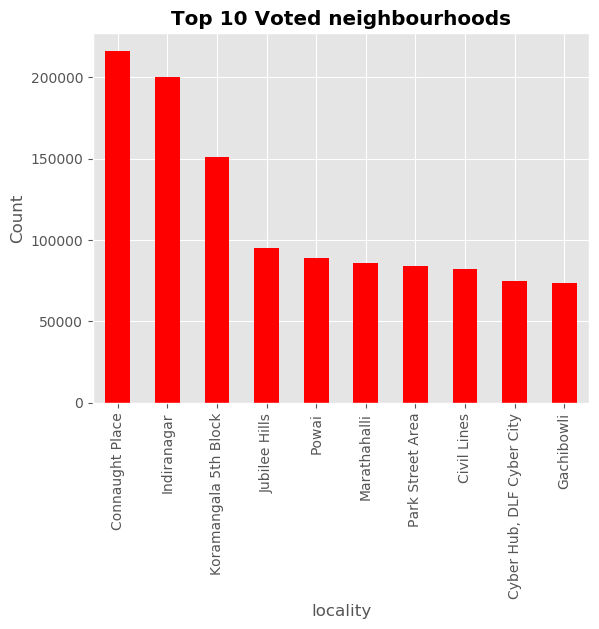

In [111]:
df.groupby('locality')['votes'].sum().sort_values(ascending=False)[:10].plot(kind='bar',color="r")
plt.title('Top 10 Voted neighbourhoods',weight='bold')
plt.ylabel('Count');

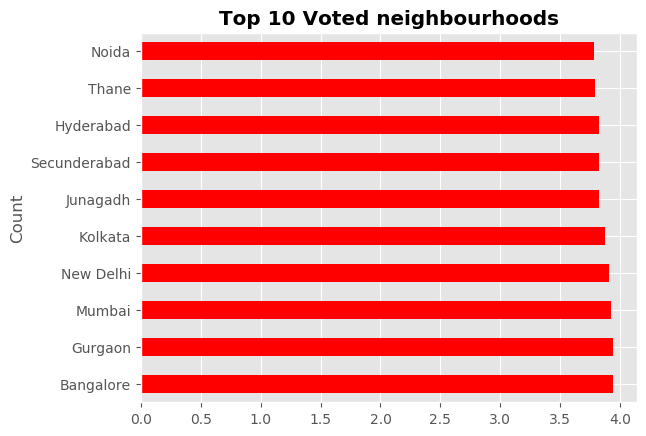

In [131]:
df[df["aggregate_rating"]>0].groupby('city')['aggregate_rating'].mean().sort_values(ascending=False)[:10].plot(kind='barh',color="r")
plt.title('Top 10 Voted cities',weight='bold')
plt.ylabel('Count');